In [57]:
import numpy as np
import torch
import torch.nn as nn                                                
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool = nn.MaxPool2d(5,5)

        self.pool2 = nn.MaxPool2d(3,3)
        self.dropout = nn.Dropout(p=0.5)
        self.conv2 = nn.Conv2d(10, 10, 3)
        self.conv3 = nn.Conv2d(10, 10, 3)
        
        self.fc1 = nn.Linear(150, 110)
        self.fc2 = nn.Linear(110, 100)
        self.fc3 = nn.Linear(100, 4)

    def forward(self, x):
        x = batch_to_canny(x)

        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))
        x = F.relu(self.conv3(x))

        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = (self.fc3(x))      ## removed relu
        return x

cellnet_1 = Net()

In [6]:
cellnet_1.load_state_dict(torch.load("cellnet_1.pt"))

<All keys matched successfully>

In [71]:
def preprocess(img_path, show = False):
    
    im = Image.open(img_path).convert("L")
    im = im.resize((120, 90))
    np_im = np.array(im)
    if show == True:
        
        plt.imshow(np_im)
        plt.xlabel("Original image", fontsize = 20)
        plt.show()
    inp = torch.from_numpy(np_im).unsqueeze(0).unsqueeze(0).float()  ## tensor ready to be fed to nn 
    
    return inp 



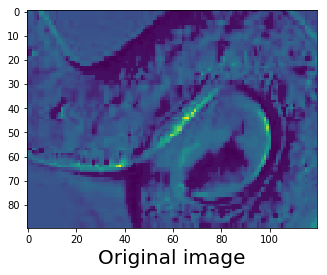

In [72]:
inp = preprocess("cell_1.png", show = True)

In [87]:
def show_layers(model, image_tensor, layer_number):
    features = nn.Sequential(*list(cellnet_1.children())[:layer_number])
    mm = features(inp).detach().numpy()
    
    images = []
    for i in mm[0]:
        images.append(i)
    f = plt.figure(figsize = (35,20))

    for m in range (1,len(images)):
        f.add_subplot(1,len(images), m)

        plt.imshow(images[m], cmap = 'gnuplot2', label = "Canny")
    plt.show()

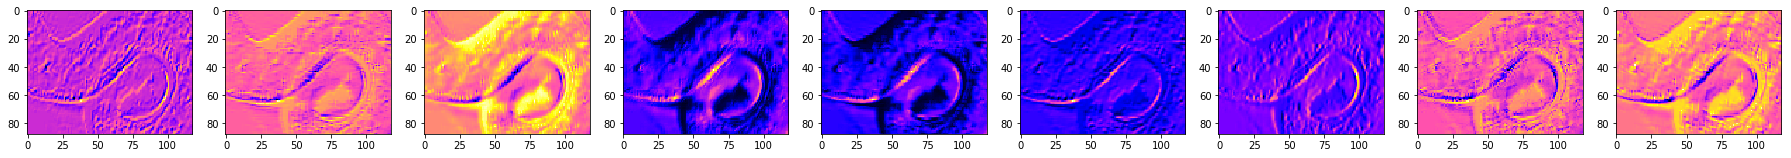

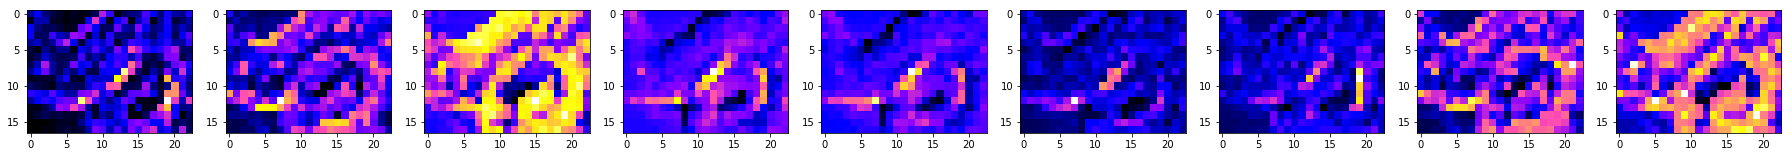

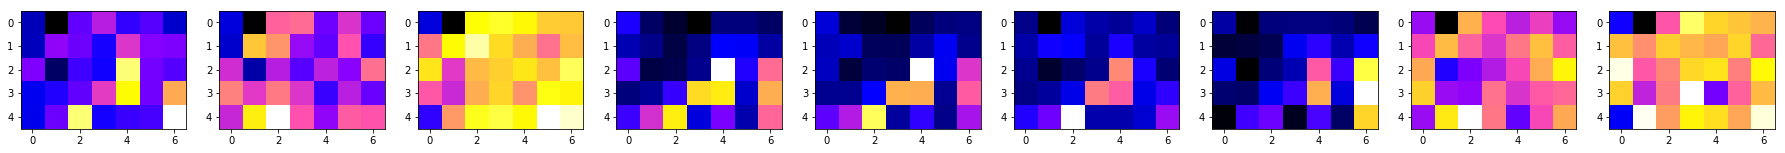

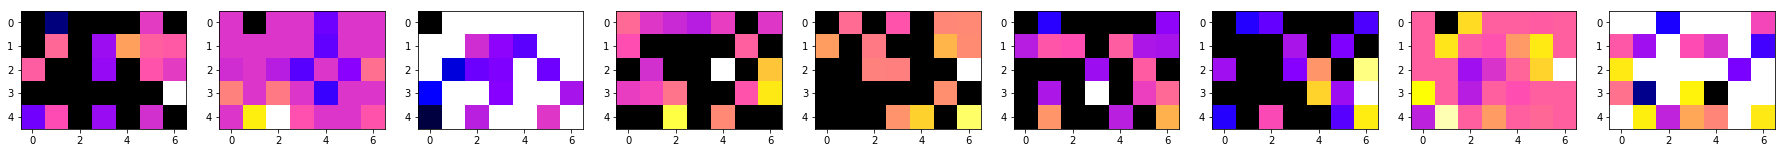

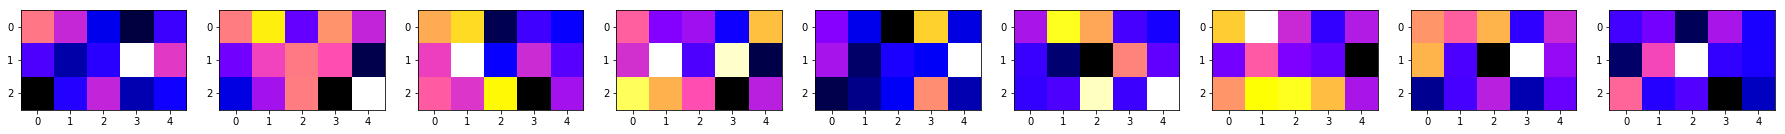

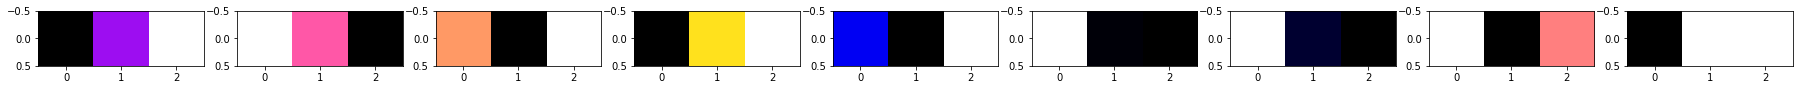

In [93]:
for i in range(1,7):
    show_layers(cellnet_1, inp, i)